In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
%matplotlib inline

In [2]:

df = pd.read_csv("../../assets/datasets/wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


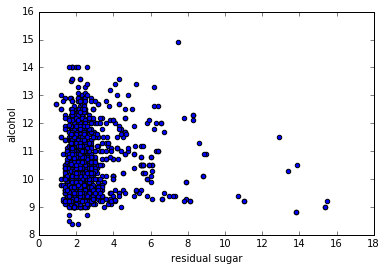

In [4]:
df.plot(kind='scatter',x='residual sugar', y='alcohol')


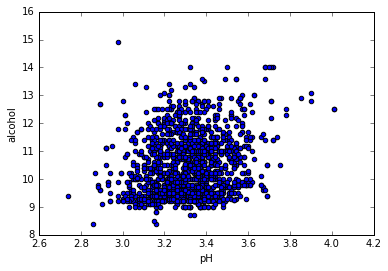

In [5]:
df.plot(kind='scatter',x='pH', y='alcohol')

In [6]:
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [7]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# you have to standarize

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
x_standard=StandardScaler().fit_transform(x)

In [10]:
k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [11]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [12]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [13]:
predY = np.choose(labels, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(np.int64)
#

In [14]:
y.head()
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
predictions = kmeans.predict(x_standard)

In [16]:
pd.Series(predictions).value_counts()

3    1599
dtype: int64

In [17]:
from sklearn.metrics import accuracy_score, silhouette_score
metrics.accuracy_score(y, predY)

0.08943089430894309

#if you make clusters based on how many things are 3 but was put in 3


In [18]:
df= df.join(pd.DataFrame(predictions, columns=['custers8']))

In [26]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,custers8
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,3


In [24]:
df.groupby('custers8')['quality'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.SeriesGroupBy object at 0x11aa95b10>>

In [25]:
df.groupby('custers8')['alcohol'].min()

custers8
3    8.4
Name: alcohol, dtype: float64

In [27]:
df.shape

(1599, 13)